# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
%matplotlib inline

# Importing Dataset

### *All data was prepared using Google Dataprep , then we don't need to do any preprocessing in the notebook

In [3]:
df = pd.read_csv("base_superbock.csv", index_col=False)
df.columns

Index(['CONDIGO_PRODUTO', 'OEE', 'SOMA_GEA', 'TEMPO_DEGRADADO',
       'TRABALHO_REAL_ELETRICISTA', 'TRABALHO_REAL_MECANICO',
       'TRABALHO_REAL_PREVENTIVA', 'OUTROS_TEMPOS_PARAGEM', 'TEMPO_ARRANQUE',
       ' TEMPO_EMBALAGEM_IMPROPRIA', 'TEMPO_TESTES', 'TEMPO_FALHA_LOGISTICA',
       ' TEMPO_LIMPEZA', ' TMP_TAM', ' TEMPO_ALMOCO', ' L1_TAV', 'L2_TAV',
       'L3_TAV', 'L4_TAV', 'L5_TAV', 'L6_TAV', 'L7_TAV', 'TAV_BANDEADORA',
       ' TAV_CINTADORA', ' TAV_DESENGRADORA', ' TAV_DESPALETIZADORA',
       ' TAV_EMBALADORA', ' TAV_ENCARTONADORA', 'TAV_ENGRADADORA',
       ' TAV_ENVOLVEDORA', ' TAV_INSPETOR_CHEIO', ' TAV_INSPETOR_VAZIO',
       ' TAV_LAVADORA', ' TAV_PALETIZADORA', ' TAV_PASTEURIZADOR',
       ' TAV_ROTULADORA', ' TAV_SOPRADORA', ' TAV_TRANSPORTADORES'],
      dtype='object')

In [26]:
df.drop([' L1_TAV', 'L2_TAV','L3_TAV', 'L4_TAV', 'L5_TAV', 'L7_TAV'],axis=1,inplace=True)
df.dtypes

CONDIGO_PRODUTO                 int64
OEE                           float64
SOMA_GEA                        int64
TEMPO_DEGRADADO               float64
TRABALHO_REAL_ELETRICISTA     float64
TRABALHO_REAL_MECANICO        float64
TRABALHO_REAL_PREVENTIVA        int64
OUTROS_TEMPOS_PARAGEM         float64
TEMPO_ARRANQUE                float64
 TEMPO_EMBALAGEM_IMPROPRIA    float64
TEMPO_TESTES                  float64
TEMPO_FALHA_LOGISTICA         float64
 TEMPO_LIMPEZA                float64
 TMP_TAM                      float64
 TEMPO_ALMOCO                 float64
L6_TAV                        float64
TAV_BANDEADORA                  int64
 TAV_CINTADORA                  int64
 TAV_DESENGRADORA               int64
 TAV_DESPALETIZADORA            int64
 TAV_EMBALADORA               float64
 TAV_ENCARTONADORA            float64
TAV_ENGRADADORA               float64
 TAV_ENVOLVEDORA                int64
 TAV_INSPETOR_CHEIO             int64
 TAV_INSPETOR_VAZIO             int64
 TAV_LAVADOR

# Understanding Correlation

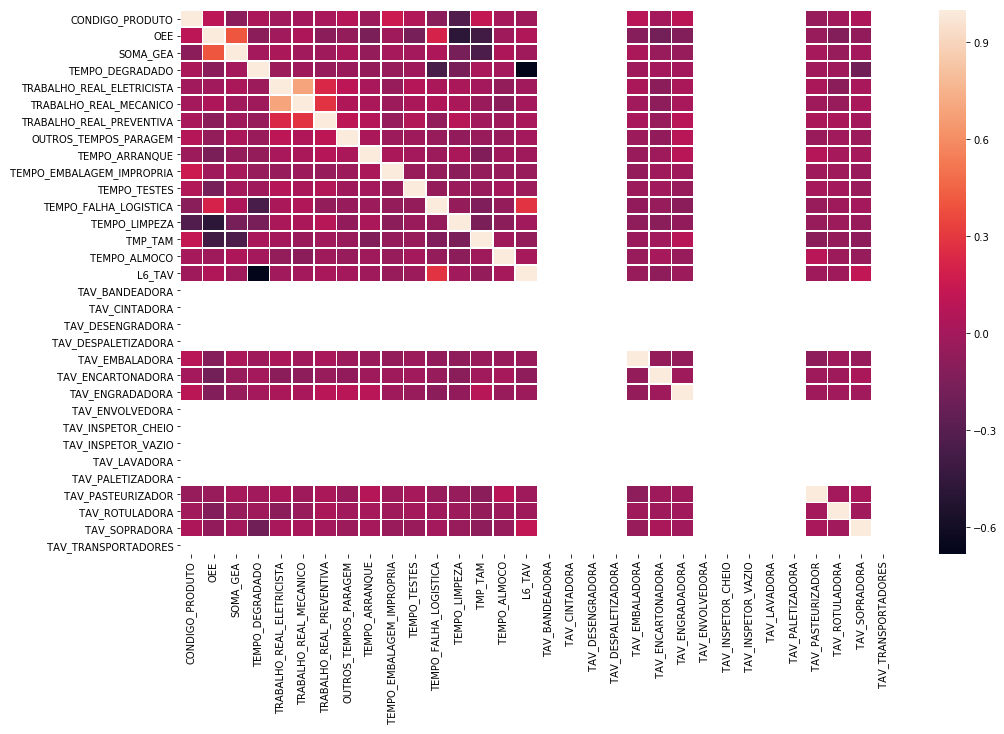

In [33]:
correlation = df.corr()

plt.figure(figsize = (16,10))
sns.heatmap(correlation, annot=False, linewidths=.5)

### Select target variable and independent variables

In [37]:
X = df.drop(['OEE',
             ' TAV_DESENGRADORA',' TAV_INSPETOR_CHEIO',' TAV_LAVADORA','TAV_BANDEADORA',
             ' TAV_CINTADORA',' TAV_DESPALETIZADORA',' TAV_ENVOLVEDORA',' TAV_INSPETOR_VAZIO',
             ' TAV_PALETIZADORA'
            ],axis=1)
y = df['OEE']

# Split data

 - 45% for training
 - 33% for testing
 - 22% for validation

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

### Set the model: Theil–Sen estimator

In [39]:
from sklearn import linear_model
from sklearn import ensemble

# lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
# lr = ensemble.GradientBoostingRegressor()
# lr = linear_model.LinearRegression()
lr = linear_model.TheilSenRegressor()

### Train the model

In [40]:
model = lr.fit(X_train, y_train)

### Get the model's score by testing with unseen data

In [41]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.9613709322850554


### Validate our model using validation data

In [42]:
predictions = model.predict(X_val)

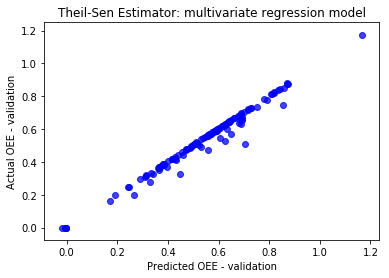

In [43]:
# plot data
def print_graph(validation, predicted):
    actual_values = validation
    plt.scatter(predicted, actual_values, alpha=.75,
                color='b') #alpha helps to show overlapping data
    plt.xlabel('Predicted OEE - validation')
    plt.ylabel('Actual OEE - validation')
    plt.title('Theil-Sen Estimator: multivariate regression model')

print_graph(y_val, predictions)

### Coeficients calculated by the model

In [44]:
print(model.coef_)

[-2.28614102e-12  1.30331990e-09 -9.85334338e-01 -7.79190383e-06
 -2.57100845e-05 -2.26809176e-05 -1.00257560e+00 -6.93351950e-01
 -9.91212412e-01 -7.65798461e-01 -9.81584796e-01 -9.97980003e-01
 -1.00207765e+00 -1.03139751e+00 -1.00042452e+00 -9.88960401e-01
 -9.96468471e-01 -9.97813633e-01 -9.74297429e-01 -5.51636276e-01
 -9.93036344e-01  0.00000000e+00]
